### This notebook answers assignment part B question 2

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
raw_data = pd.read_csv('pima-indians-diabetes1.csv')
raw_data.columns = ['pregnant number','pgc','dbp','sft','insulin','bmi','dpf','age','class']

In [3]:
print(raw_data.describe())
attributes = raw_data.iloc[:,:-1].values
labels = raw_data.iloc[:,-1].values
trainX, testX, trainY, testY  = train_test_split(attributes,labels,test_size=0.3,random_state=30,stratify=labels)

       pregnant number         pgc         dbp         sft     insulin  \
count       767.000000  767.000000  767.000000  767.000000  767.000000   
mean          3.842243  120.859192   69.101695   20.517601   79.903520   
std           3.370877   31.978468   19.368155   15.954059  115.283105   
min           0.000000    0.000000    0.000000    0.000000    0.000000   
25%           1.000000   99.000000   62.000000    0.000000    0.000000   
50%           3.000000  117.000000   72.000000   23.000000   32.000000   
75%           6.000000  140.000000   80.000000   32.000000  127.500000   
max          17.000000  199.000000  122.000000   99.000000  846.000000   

              bmi         dpf         age       class  
count  767.000000  767.000000  767.000000  767.000000  
mean    31.990482    0.471674   33.219035    0.348110  
std      7.889091    0.331497   11.752296    0.476682  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243500   24.000000    0.000000

#### Q 2.1

In [4]:
classifier = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150, random_state=30, solver='sgd')
classifier.fit(trainX,trainY)
predictions = classifier.predict(testX)

In [5]:
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       151
           1       0.55      0.53      0.54        80

    accuracy                           0.69       231
   macro avg       0.65      0.65      0.65       231
weighted avg       0.68      0.69      0.69       231



#### Q 2.2

In [6]:
mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150,solver='sgd',random_state=30)

N = trainX.shape[0]
EPOCH = 25
BATCH_SIZE = 64
CLASSES = np.unique(trainY)

scores_train = []
scores_test = []
mlploss = []

In [7]:
epoch = 0
while epoch < EPOCH:
#     print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(trainX.shape[0])
    
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + BATCH_SIZE]        
        mlp.partial_fit(trainX[indices], trainY[indices], classes=CLASSES)
        mini_batch_index += BATCH_SIZE

        if mini_batch_index >= N:
            break

    # SCORE TRAIN
    scores_train.append(1-mlp.score(trainX, trainY))
    
     # SCORE TEST
    scores_test.append(1-mlp.score(testX, testY))
    
    # compute loss
    
    mlploss.append(mlp.loss_)
    epoch += 1


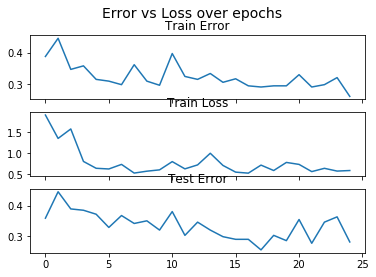

In [8]:
""" Plot """
fig, ax = plt.subplots(3, sharex=True)
ax[0].plot(scores_train)
ax[0].set_title('Train Error')
ax[1].plot(mlploss)
ax[1].set_title('Train Loss')
ax[2].plot(scores_test)
ax[2].set_title('Test Error')
fig.suptitle("Error vs Loss over epochs", fontsize=14)
plt.show()

#  explain why the trend?

#### Q 2.3

In [9]:
def neuronExperiment(trainX,trainY,testX,testY):
    data = []
    mlp = MLPClassifier(hidden_layer_sizes=(20,), max_iter=150, random_state=30,solver='sgd')
    mlp.fit(trainX,trainY)
    predictions = mlp.predict(testX)
    score = accuracy_score(testY,predictions)
    data.append({'Neurons':(20,0),'Accuracy':score})
    for i in range(1,20):
        mlp = MLPClassifier(hidden_layer_sizes=(20-i,i), max_iter=150, random_state=30,solver='sgd')
        mlp.fit(trainX,trainY)
        predictions = mlp.predict(testX)
        score = accuracy_score(testY,predictions)
        data.append({'Neurons':(20-i,i),'Accuracy':score})   
    pd.set_option('display.precision',20)
    dataFrame = pd.DataFrame(data,columns=['Neurons','Accuracy'])
#     print(dataFrame.to_string(index=False))
    return dataFrame

In [24]:
diabetes = neuronExperiment(trainX,trainY,testX,testY)
print(diabetes)

     Neurons                Accuracy
0    (20, 0)  0.68831168831168831890
1    (19, 1)  0.65367965367965363832
2    (18, 2)  0.65367965367965363832
3    (17, 3)  0.65800865800865804278
4    (16, 4)  0.65367965367965363832
5    (15, 5)  0.64069264069264064698
6    (14, 6)  0.67965367965367962100
7    (13, 7)  0.67532467532467532756
8    (12, 8)  0.69264069264069261234
9    (11, 9)  0.70129870129870131024
10  (10, 10)  0.69696969696969701680
11   (9, 11)  0.59307359307359308609
12   (8, 12)  0.71861471861471859501
13   (7, 13)  0.71428571428571430157
14   (6, 14)  0.67965367965367962100
15   (5, 15)  0.70562770562770560367
16   (4, 16)  0.67532467532467532756
17   (3, 17)  0.70129870129870131024
18   (2, 18)  0.65367965367965363832
19   (1, 19)  0.65367965367965363832


#### Q 2.4 
##### explain why there is variation in accuracy
The weights and biases of the each of 20 Multi Layer perceptron networks are assigned at random for every instance. Based on the type of data and its compantibality with the classifier, the combination of neurons in each layer can vary. There is no standard architecture that gives the best accuracy across any dataset. To obtain desirable accuracy for a specific data set, it is advised to check maximum permutations and combinations by trial and error method. 

#### Q 2.5
Four suitable criteria for other datasets
<ol>
    <li>Number of features or attributes should be around 8</li>
    <li>Should be a classification problem</li>
    <li>Should contain only numerical data</li>
    <li>Should not contain any missing values</li>
 
</ol>

#### Q 2.6

##### Data set **Immunotherapy**

In [11]:
immunotherapy = pd.read_excel('Immunotherapy.xlsx')
immunotherapy.head()
immunoAttributes = immunotherapy.iloc[:,:7]
immunoLabels = immunotherapy.iloc[:,-1]

In [12]:
immunoTrainX,immunoTestX,immunoTrainY,immunoTestY = train_test_split(immunoAttributes,immunoLabels,test_size=.3,random_state=30,stratify=immunoLabels)
immunoResults = neuronExperiment(immunoTrainX,immunoTrainY,immunoTestX,immunoTestY)

##### Data set **Cryotherapy**

In [13]:
cryotherapy = pd.read_excel('Cryotherapy.xlsx')
cryotherapy.head()
cryoAttributes = cryotherapy.iloc[:,:6]
cryoLabels = cryotherapy.iloc[:,-1]

In [14]:
cryoTrainX,cryoTestX,cryoTrainY,cryoTestY = train_test_split(cryoAttributes,cryoLabels,test_size=.3,random_state=30,stratify=cryoLabels)
cryoResults = neuronExperiment(cryoTrainX,cryoTrainY,cryoTestX,cryoTestY)

##### Data set **Somerville Happiness**

In [15]:
soha = pd.read_csv('SomerHappi.csv',encoding='utf-16')
sohaAttributes = soha.iloc[:,1:]
sohaLabels = soha.iloc[:,0]

In [16]:
sohaTrainX,sohaTestX,sohaTrainY,sohaTestY = train_test_split(sohaAttributes,sohaLabels,test_size=.3,random_state=30,stratify=sohaLabels)
sohaResults = neuronExperiment(sohaTrainX,sohaTrainY,sohaTestX,sohaTestY)

In [17]:
occu = pd.read_csv('occupancy.csv')
occuAttributes = occu.iloc[:,:5]
occuLabels = occu.iloc[:,5]

In [18]:
occuTrainX,occuTestX,occuTrainY,occuTestY = train_test_split(occuAttributes,occuLabels,test_size=.3,random_state=30,stratify=occuLabels)
occuResults = neuronExperiment(occuTrainX,occuTrainY,occuTestX,occuTestY)

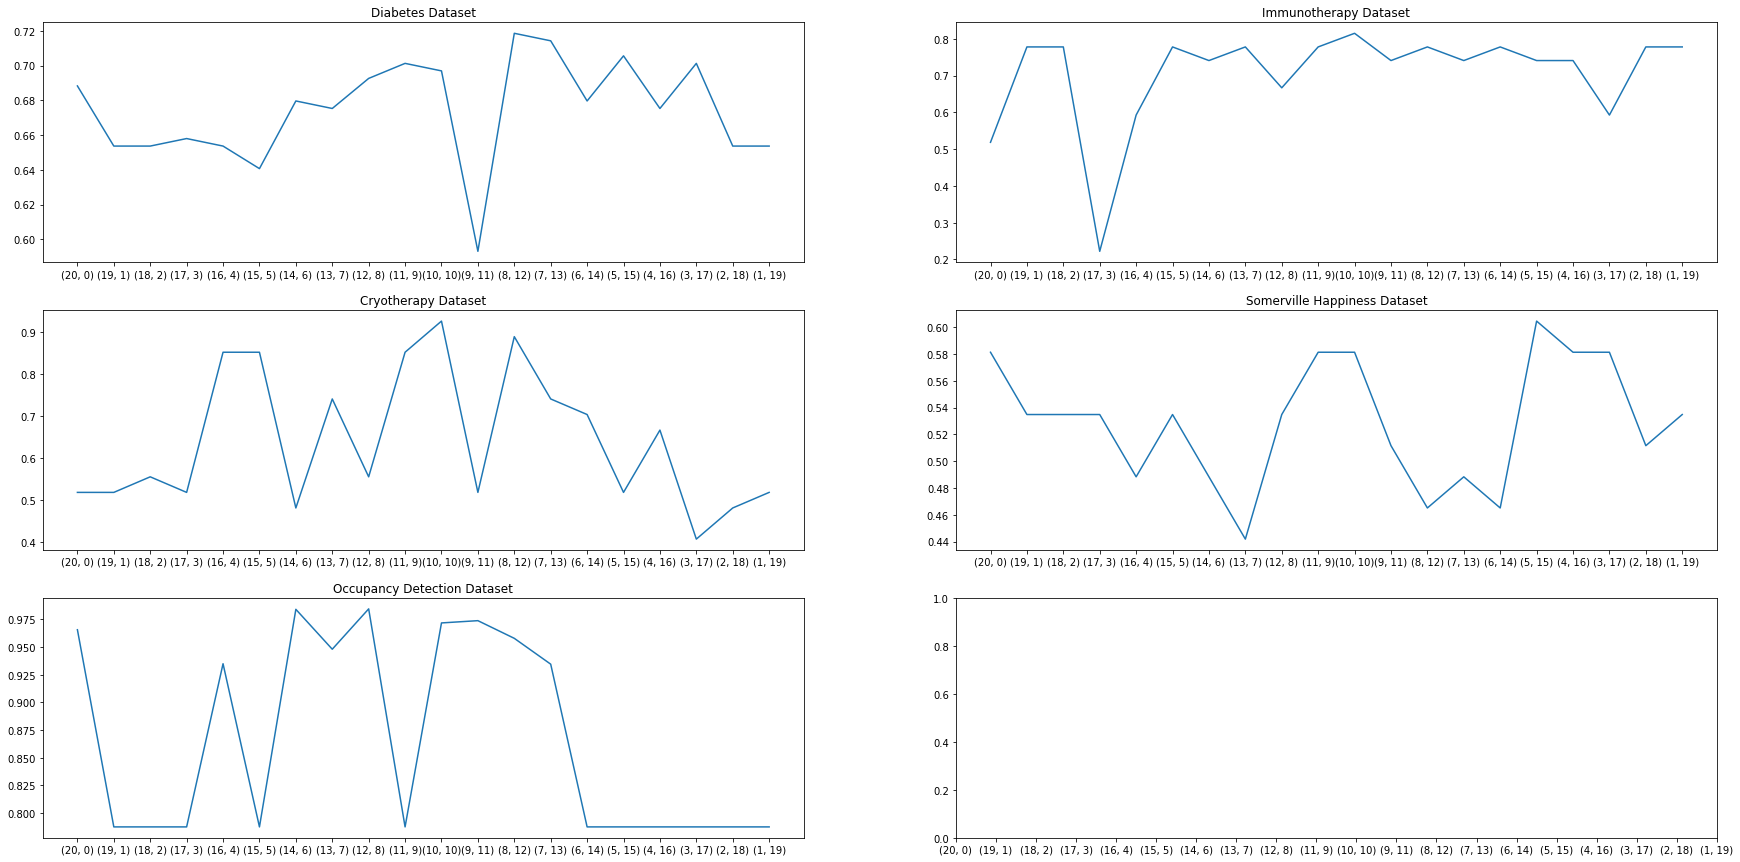

In [23]:
fig,axs = plt.subplots(3,2,figsize=(30,15))
axs[0, 0].plot(diabetes.iloc[:,1])
axs[0, 0].set_title('Diabetes Dataset')
axs[0, 1].plot(immunoResults.iloc[:,1])
axs[0, 1].set_title('Immunotherapy Dataset')
axs[1, 0].plot(cryoResults.iloc[:,1])
axs[1, 0].set_title('Cryotherapy Dataset')
axs[1, 1].plot(sohaResults.iloc[:,1])
axs[1, 1].set_title('Somerville Happiness Dataset')
axs[2, 0].plot(occuResults.iloc[:,1])
axs[2, 0].set_title('Occupancy Detection Dataset')
xaxis = np.arange(0,20,1)
xaxislabels = [(20-i,i) for i in xaxis]
plt.setp(axs, xticks=np.arange(0,20,1), xticklabels=xaxislabels)
plt.show()